Ex - GroupBy
Introduction:
GroupBy can be summarizes as Split-Apply-Combine.

Check out this [Diagram](https://i.imgur.com/yjNkiwL.png)

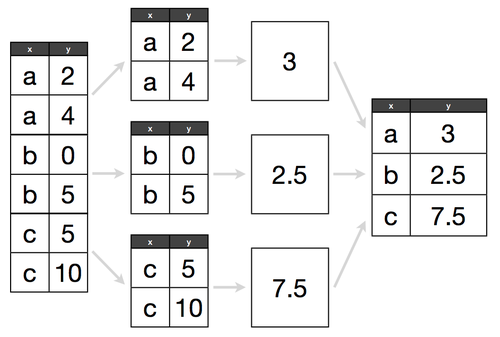

# Step 1. Import the necessary libraries

In [1]:
import pandas as pd

# Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv).

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/drinks.csv'

# Step 3. Assign it to a variable called drinks.

In [3]:
drinks = pd.read_csv(url)

# Step 4. Which continent drinks more beer on average?

In [10]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     170 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


In [16]:
drinks.head(2)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU


In [6]:
drinks.continent.unique()

array(['AS', 'EU', 'AF', nan, 'SA', 'OC'], dtype=object)

In [18]:
dr_gby_continent_sum = drinks.groupby('continent').sum()
dr_gby_continent_sum

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,3258,866,862,159.4
AS,1630,2677,399,95.5
EU,8720,5965,6400,387.8
OC,1435,935,570,54.1
SA,2101,1377,749,75.7


In [22]:
dr_gby_continent_sum.sort_values('beer_servings', ascending=False)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
EU,8720,5965,6400,387.8
AF,3258,866,862,159.4
SA,2101,1377,749,75.7
AS,1630,2677,399,95.5
OC,1435,935,570,54.1


In [26]:
dr_gby_continent_sum.sort_values('beer_servings', ascending=False).head(1).index[0]

'EU'

## 위의 sum을 사용하면 총량이기때문에 average를 물었으니, mean을 상용해야한다. 

In [70]:
drinks.groupby('continent').beer_servings.mean()

continent
AF     61.471698
AS     37.045455
EU    193.777778
OC     89.687500
SA    175.083333
Name: beer_servings, dtype: float64

# Step 5. For each continent print the statistics for wine consumption.

In [27]:
dr_gby_continent_sum.wine_servings

continent
AF     862
AS     399
EU    6400
OC     570
SA     749
Name: wine_servings, dtype: int64

## 문제를 똑바로 statistics를 물었다. 즉 describe 를 원하는것.

In [72]:
drinks.groupby('continent').wine_servings.describe()

,count,mean,std,min,25%,50%,75%,max
continent,,,,,,,,
AF,53.0,16.264151,38.846419,0.0,1.0,2.0,13.00,233.0
AS,44.0,9.068182,21.667034,0.0,0.0,1.0,8.00,123.0
EU,45.0,142.222222,97.421738,0.0,59.0,128.0,195.00,370.0
OC,16.0,35.625000,64.555790,0.0,1.0,8.5,23.25,212.0
SA,12.0,62.416667,88.620189,1.0,3.0,12.0,98.50,221.0


# Step 6. Print the mean alcohol consumption per continent for every column

In [28]:
dr_gby_continent_mean = drinks.groupby('continent').mean()
dr_gby_continent_mean

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,61.471698,16.339623,16.264151,3.007547
AS,37.045455,60.840909,9.068182,2.170455
EU,193.777778,132.555556,142.222222,8.617778
OC,89.687500,58.437500,35.625000,3.381250
SA,175.083333,114.750000,62.416667,6.308333


위에까지만이 정답!!

In [29]:
dr_gby_continent_mean.total_litres_of_pure_alcohol

continent
AF    3.007547
AS    2.170455
EU    8.617778
OC    3.381250
SA    6.308333
Name: total_litres_of_pure_alcohol, dtype: float64

# Step 7. Print the median alcohol consumption per continent for every column

In [73]:
drinks.groupby('continent').median()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
continent,,,,
AF,32.0,3.0,2.0,2.30
AS,17.5,16.0,1.0,1.20
EU,219.0,122.0,128.0,10.00
OC,52.5,37.0,8.5,1.75
SA,162.5,108.5,12.0,6.85


# Step 8. Print the mean, min and max values for spirit consumption.
This time output a DataFrame

In [32]:
drinks.describe()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
count,193.000000,193.000000,193.000000,193.000000
mean,106.160622,80.994819,49.450777,4.717098
std,101.143103,88.284312,79.697598,3.773298
min,0.000000,0.000000,0.000000,0.000000
25%,20.000000,4.000000,1.000000,1.300000
50%,76.000000,56.000000,8.000000,4.200000
75%,188.000000,128.000000,59.000000,7.200000
max,376.000000,438.000000,370.000000,14.400000


In [58]:
(dr_spirit_gby_continent.mean())

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
SA    114.750000
Name: spirit_servings, dtype: float64

In [74]:
df1 = pd.DataFrame([dr_spirit_gby_continent.mean(), 
                    dr_spirit_gby_continent.min(), 
                    dr_spirit_gby_continent.max()], 
                   index=['mean', 'min', 'max']).T

In [75]:
df1

,mean,min,max
continent,,,
AF,16.339623,0.0,152.0
AS,60.840909,0.0,326.0
EU,132.555556,0.0,373.0
OC,58.437500,0.0,254.0
SA,114.750000,25.0,302.0


다른 정답

In [76]:
drinks.groupby('continent').spirit_servings.agg(['mean','min','max'])

,mean,min,max
continent,,,
AF,16.339623,0,152
AS,60.840909,0,326
EU,132.555556,0,373
OC,58.437500,0,254
SA,114.750000,25,302


## .agg 란?

* 여러개의 함수를 여러개에 적용한다. 